
#          **Car Price Prediction** 

   ![](https://www.animatedimages.org/data/media/67/animated-car-image-0151.gif)

### Introduction:
*  The price of a car is influenced by a multitude of factors, such as the reputation of the car brand, the car's features, its horsepower, mileage,and numerous other attributes. Car price prediction holds a significant place in the realm of machine learning research. This project is designed to guide you through the process of training a car price prediction model, making it an excellent starting point if you're interested in delving into this captivating field.



### Objective:
*  This project aims to develop a car price prediction model using machine learning techniques. We will explore a dataset containing relevant information about cars, including their features and prices. By leveraging this data, we will learn how to preprocess the information, train a predictive model, and assess its performance.

### Steps Covered:
#### - Data loading and exploration to understand the dataset.
#### - Data preprocessing, including encoding categorical variables.
#### - Splitting the dataset into training and testing sets.
#### - Model selection, training, and evaluation using Linear Regression.
#### - Prediction of car prices for a new set of features.

#### By the end of this project, you will have gained insights into the essential steps of training a car price prediction model, and you'll be better equipped to embark on more advanced machine learning endeavors.

#### Let's begin by loading the necessary libraries and exploring the dataset.
# --------------------------------------------------


## **Import Libraries and Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/car-price/CarPrice_Assignment.csv")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **Explore Dataset**

In [2]:
# Display first few rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [48]:
# Display dataset shape
df.shape

(205, 26)

In [49]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [50]:
# Check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [51]:
# Display column names
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [52]:
# Display summary statistics
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## **Data Visualization - Fuel Type Distribution**

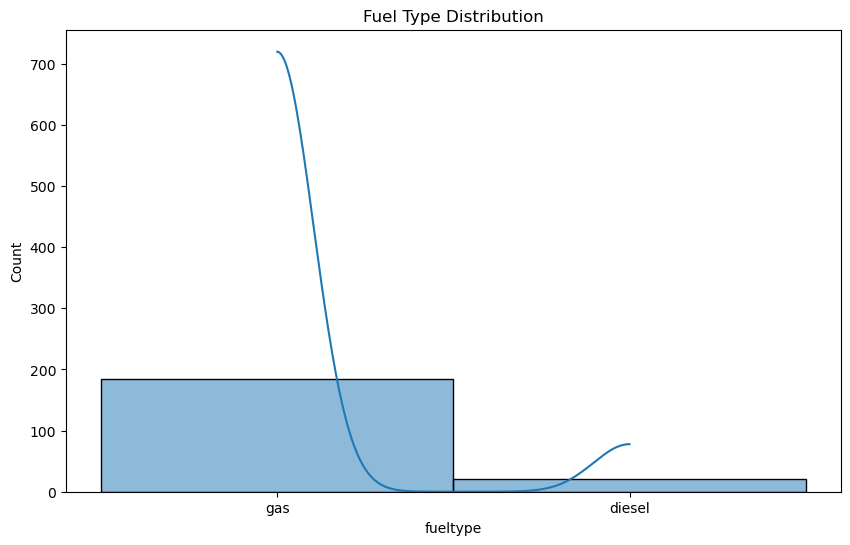

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fueltype", bins=20, kde=True)
plt.title("Fuel Type Distribution")
plt.show()

## **Data Visualization - Engine Size vs Horsepower**

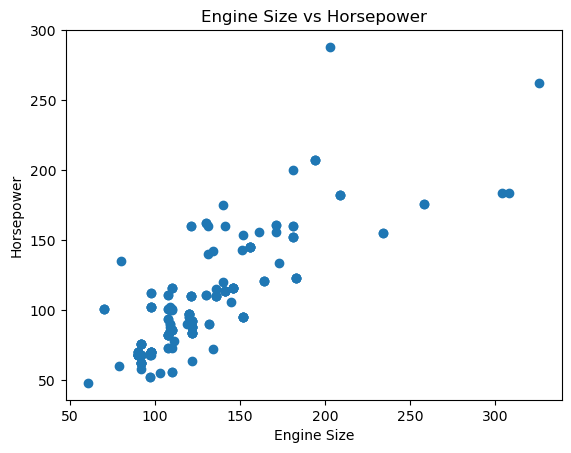

In [54]:
plt.scatter(df['enginesize'], df['horsepower'])
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.title('Engine Size vs Horsepower')
plt.show()

## **Data Visualization - Distribution of Price**

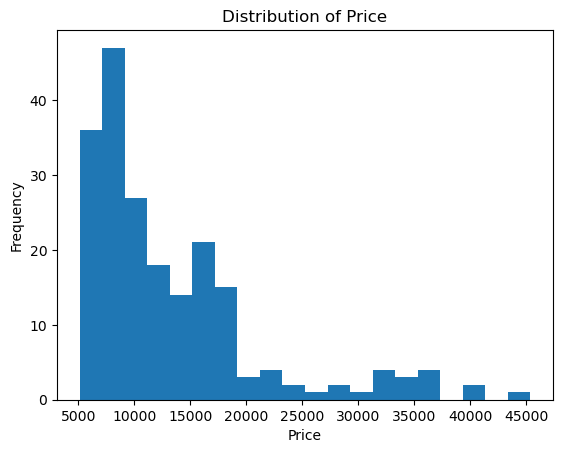

In [57]:
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

## **Data Visualization - Pair Plot**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


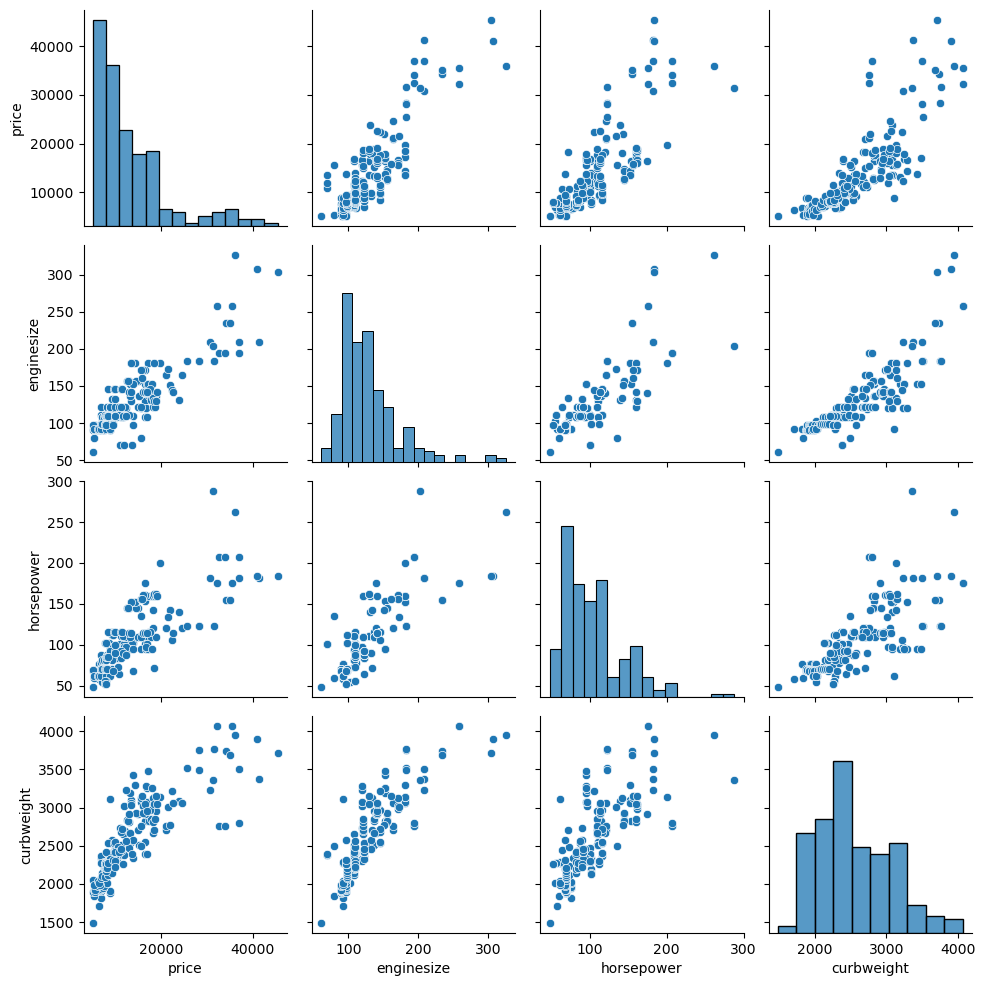

In [59]:
sns.pairplot(df[['price','enginesize','horsepower','curbweight']])
plt.show()

## **Data Preprocessing**

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns

for i in var_mod:
    df[i] = le.fit_transform(df[i])


## **Split Data and Train-Test Split**

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


## **Model Selection and Training**

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

## **Model Evaluation**

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 10373631.415093796
R-squared: 0.6383820089678751


## **Price Prediction for New Car Features**

In [69]:
new_car_features = [4000, 0, 2, 3, 0, 96.0, 172.0, 65.4, 2221, 120, 4, 3.46, 3.19, 9.0, 68, 5500, 31, 38, 0, 0, 0, 0, 0, 0, 0]
new_car_price = model.predict([new_car_features])
print("Predicted Price:", new_car_price[0])


Predicted Price: 26151271.031564336


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
